
---
# <center> **Classification Problems & Features importance** </center>

---


## Packages imports

In [61]:
#install 
%pip install seaborn
%pip install -U scikit-learn
%pip install pandas-profiling
%pip install simplified-scrapy
%pip install openpyxl

#mongo DB 
from pymongo import MongoClient
import pymongo

#data treatment
import pandas as pd
from pandas import DataFrame
import numpy as np
import random
from pandas_profiling import ProfileReport

#vizualisation
import matplotlib.pyplot as plt 
import seaborn as sns
from itertools import chain
#import dash_bootstrap_components as dbc
from matplotlib.legend import Legend


#Classification ML
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing


import seaborn as sns

#SHAP
%pip install shap
import shap


import math
from itertools import zip_longest
from openpyxl import Workbook
import os,sys

from collections import OrderedDict


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
%matplotlib inline

## **Read Data**

In [63]:
urlsprojects = pd.read_csv('data_Urls.csv')


In [64]:
#Useful function if we want to display a specific number of row and columns
#Set to None if you want to display all 

pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',None)

## Data exploration & treatment

In [65]:
urlsprojects = urlsprojects.drop(labels = 'Unnamed: 0', axis = 1)
urlsprojects

,performance,accessibility,largestContentfulPaint,cumulativeLayoutShift,firstContentfulPaint,speedIndex,totalBlockingTime,interactive,addExpiresOrCacheControlHeaders,compressHttp,domainsNumber,dontResizeImageInBrowser,emptySrcTag,externalizeCss,externalizeJs,httpError,httpRequests,imageDownloadedNotDisplayed,jsValidate,maxCookiesLength,minifiedCss,minifiedJs,noCookieForStaticRessources,noRedirect,optimizeBitmapImages,optimizeSvg,plugins,printStyleSheet,socialNetworkButton,styleSheets,useETags,useStandardTypefaces,viewport,serverResponseTime,criticalRequestChains,mainthreadWorkBreakdown,bootupTime,usesRelPreload,fontDisplay,networkRtt,networkServerLatency,thirdPartySummary,thirdPartyFacades,lcpLazyLoaded,longTasks,nonCompositedAnimations,preloadLcpImage,domSize,usesLongCacheTtl,usesResponsiveImages,offscreenImages,unminifiedCss,unminifiedJavascript,unusedCssRules,unusedJavascript,usesOptimizedImages,modernImageFormats,usesTextCompression,usesHttp2,efficientAnimatedContent,duplicatedJavascript,legacyJavascript,totalByteWeight,noDocumentWrite,redirects,layoutShiftElements,usesPassiveEventListeners,ecoIndex,grade
0,15,91,0,100,0,0,0,0,50,75,0,20,100,0,0,0,35,100,0,100,0,35,100,100,100,100,100,0,100,20,0,0,100,100,0,0.0,2.0,0,0,0,0,0,0,100,0,0,100,19.0,6.0,100.0,100.0,100.0,100.0,75.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,88.0,87.0,100,100.0,0,100,36,E
1,27,92,6,100,66,30,2,7,0,75,0,100,100,75,100,100,65,100,0,100,100,0,100,75,100,100,100,0,100,75,0,0,100,100,0,80.0,89.0,0,100,0,0,100,0,0,0,0,100,100.0,7.0,100.0,100.0,100.0,43.0,88.0,34.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100,100.0,0,100,73,B
2,46,77,76,100,47,27,10,14,0,35,0,35,100,50,0,100,20,100,0,100,0,0,100,0,100,100,100,0,100,35,0,0,0,100,0,100.0,100.0,0,100,0,0,0,0,0,0,0,0,100.0,64.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,79.0,100.0,100.0,100.0,100.0,100.0,100.0,100,100.0,0,100,57,C
3,0,63,0,100,96,100,100,100,0,0,100,100,100,75,100,100,100,100,100,100,0,0,100,75,100,100,100,0,100,100,100,100,100,0,0,13.0,36.0,0,0,0,0,0,0,0,0,0,100,100.0,34.0,100.0,100.0,100.0,100.0,88.0,40.0,100.0,88.0,50.0,100.0,70.0,100.0,100.0,100.0,0,100.0,0,100,92,A
4,15,85,2,70,5,9,8,6,50,75,0,20,100,0,0,100,20,50,0,100,0,35,100,0,100,100,100,0,100,0,0,0,100,100,0,8.0,32.0,0,0,0,0,0,0,100,0,0,100,57.0,40.0,78.0,82.0,100.0,100.0,49.0,36.0,100.0,44.0,100.0,100.0,100.0,100.0,100.0,100.0,100,31.0,0,0,16,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,32,92,33,99,16,46,9,4,0,75,0,0,100,0,0,50,0,50,0,100,0,35,100,75,0,50,100,0,100,0,0,0,100,100,0,69.0,95.0,0,100,0,0,100,0,100,0,0,100,97.0,1.0,48.0,100.0,100.0,100.0,100.0,43.0,25.0,15.0,100.0,100.0,100.0,100.0,75.0,97.0,100,100.0,0,100,9,G
545,26,98,0,100,8,33,11,31,75,75,65,20,100,20,0,100,35,50,0,100,0,0,100,75,100,100,100,0,100,35,75,100,100,100,0,3.0,43.0,0,100,0,0,100,0,0,0,0,0,11.0,25.0,100.0,100.0,100.0,100.0,88.0,18.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,85.0,100,100.0,0,100,30,E
546,77,81,60,100,51,80,96,53,75,75,0,0,100,0,0,50,0,50,0,100,100,100,100,75,0,100,100,0,100,35,0,0,100,100,0,6.0,91.0,0,100,0,0,100,0,0,0,0,0,73.0,6.0,88.0,100.0,100.0,100.0,58.0,39.0,100.0,88.0,75.0,100.0,100.0,100.0,88.0,1.0,0,100.0,0,0,7,G
547,48,75,4,46,54,57,82,40,75,75,0,0,100,0,0,100,20,50,0,100,100,100,100,75,0,0,100,0,100,0,0,0,0,0,0,66.0,100.0,0,100,0,0,0,0,100,0,0,100,0.0,36.0,58.0,100.0,100.0,100.0,100.0,100.0,27.0,22.0,100.0,100.0,100.0,100.0,100.0,99.0,100,100.0,0,100,26,E


In [66]:
urlsprojects.describe()

,performance,accessibility,largestContentfulPaint,cumulativeLayoutShift,firstContentfulPaint,speedIndex,totalBlockingTime,interactive,addExpiresOrCacheControlHeaders,compressHttp,domainsNumber,dontResizeImageInBrowser,emptySrcTag,externalizeCss,externalizeJs,httpError,httpRequests,imageDownloadedNotDisplayed,jsValidate,maxCookiesLength,minifiedCss,minifiedJs,noCookieForStaticRessources,noRedirect,optimizeBitmapImages,optimizeSvg,plugins,printStyleSheet,socialNetworkButton,styleSheets,useETags,useStandardTypefaces,viewport,serverResponseTime,criticalRequestChains,mainthreadWorkBreakdown,bootupTime,usesRelPreload,fontDisplay,networkRtt,networkServerLatency,thirdPartySummary,thirdPartyFacades,lcpLazyLoaded,longTasks,nonCompositedAnimations,preloadLcpImage,domSize,usesLongCacheTtl,usesResponsiveImages,offscreenImages,unminifiedCss,unminifiedJavascript,unusedCssRules,unusedJavascript,usesOptimizedImages,modernImageFormats,usesTextCompression,usesHttp2,efficientAnimatedContent,duplicatedJavascript,legacyJavascript,totalByteWeight,noDocumentWrite,redirects,layoutShiftElements,usesPassiveEventListeners,ecoIndex
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.0,549.000000,549.000000,549.0,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.0,549.000000,549.000000,549.0,549.000000,549.0,549.0,549.000000,549.0,549.000000,549.0,549.0,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.0,549.000000,549.000000
mean,49.730419,81.413479,27.644809,79.491803,45.397086,44.710383,59.648452,41.123862,40.018215,63.588342,32.659381,38.424408,95.992714,38.734062,20.673953,82.877960,45.091075,74.362477,5.64663,100.0,14.644809,23.479053,100.0,60.755920,97.040073,87.723133,98.907104,5.100182,93.524590,48.834244,18.306011,34.517304,74.499089,67.577413,0.0,45.561020,62.777778,0.0,36.429872,0.0,0.0,39.708561,0.0,49.180328,0.0,0.0,82.593807,67.495446,37.978142,69.790528,74.382514,86.296903,82.721311,68.621129,44.027322,71.681239,49.885246,80.041894,76.153005,86.943534,87.435337,85.672131,71.761384,67.030965,80.433515,0.0,54.462659,48.619308
std,27.727233,12.952689,35.280827,32.023179,33.930248,36.549460,37.069159,37.329651,40.599967,25.104925,39.312460,43.888589,19.630899,41.383359,35.621455,32.646437,29.989215,34.500525,21.03592,0.0,34.266446,38.296409,0.0,38.289411,16.101022,30.386918,10.406366,22.020208,20.193178,38.417698,33.866542,47.345544,43.626384,46.851177,0.0,40.241135,37.364326,0.0,48.167184,0.0,0.0,48.974024,0.0,50.038874,0.0,0.0,36.682909,40.235285,36.825732,40.296730,38.199192,32.415826,33.669128,33.964107,33.573391,39.907677,41.101836,36.260363,37.145432,33.135677,32.396352,32.259921,41.034785,47.052938,36.400720,0.0,49.845866,26.989638
min,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,100.0,0.000000,0.000000,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,25.000000,74.000000,0.000000,67.000000,14.000000,9.000000,23.000000,6.000000,0.000000,75.000000,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,20.000000,50.000000,0.00000,100.0,0.000000,0.000000,100.0,35.000000,100.000000,100.000000,100.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.000000,31.000000,0.0,0.0000

In [67]:
df = urlsprojects

In [68]:
## drop the 0 Cols 
df = df.loc[(df != 0).any(axis=1)]

In [69]:
df.describe()

,performance,accessibility,largestContentfulPaint,cumulativeLayoutShift,firstContentfulPaint,speedIndex,totalBlockingTime,interactive,addExpiresOrCacheControlHeaders,compressHttp,domainsNumber,dontResizeImageInBrowser,emptySrcTag,externalizeCss,externalizeJs,httpError,httpRequests,imageDownloadedNotDisplayed,jsValidate,maxCookiesLength,minifiedCss,minifiedJs,noCookieForStaticRessources,noRedirect,optimizeBitmapImages,optimizeSvg,plugins,printStyleSheet,socialNetworkButton,styleSheets,useETags,useStandardTypefaces,viewport,serverResponseTime,criticalRequestChains,mainthreadWorkBreakdown,bootupTime,usesRelPreload,fontDisplay,networkRtt,networkServerLatency,thirdPartySummary,thirdPartyFacades,lcpLazyLoaded,longTasks,nonCompositedAnimations,preloadLcpImage,domSize,usesLongCacheTtl,usesResponsiveImages,offscreenImages,unminifiedCss,unminifiedJavascript,unusedCssRules,unusedJavascript,usesOptimizedImages,modernImageFormats,usesTextCompression,usesHttp2,efficientAnimatedContent,duplicatedJavascript,legacyJavascript,totalByteWeight,noDocumentWrite,redirects,layoutShiftElements,usesPassiveEventListeners,ecoIndex
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.0,549.000000,549.000000,549.0,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.0,549.000000,549.000000,549.0,549.000000,549.0,549.0,549.000000,549.0,549.000000,549.0,549.0,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.0,549.000000,549.000000
mean,49.730419,81.413479,27.644809,79.491803,45.397086,44.710383,59.648452,41.123862,40.018215,63.588342,32.659381,38.424408,95.992714,38.734062,20.673953,82.877960,45.091075,74.362477,5.64663,100.0,14.644809,23.479053,100.0,60.755920,97.040073,87.723133,98.907104,5.100182,93.524590,48.834244,18.306011,34.517304,74.499089,67.577413,0.0,45.561020,62.777778,0.0,36.429872,0.0,0.0,39.708561,0.0,49.180328,0.0,0.0,82.593807,67.495446,37.978142,69.790528,74.382514,86.296903,82.721311,68.621129,44.027322,71.681239,49.885246,80.041894,76.153005,86.943534,87.435337,85.672131,71.761384,67.030965,80.433515,0.0,54.462659,48.619308
std,27.727233,12.952689,35.280827,32.023179,33.930248,36.549460,37.069159,37.329651,40.599967,25.104925,39.312460,43.888589,19.630899,41.383359,35.621455,32.646437,29.989215,34.500525,21.03592,0.0,34.266446,38.296409,0.0,38.289411,16.101022,30.386918,10.406366,22.020208,20.193178,38.417698,33.866542,47.345544,43.626384,46.851177,0.0,40.241135,37.364326,0.0,48.167184,0.0,0.0,48.974024,0.0,50.038874,0.0,0.0,36.682909,40.235285,36.825732,40.296730,38.199192,32.415826,33.669128,33.964107,33.573391,39.907677,41.101836,36.260363,37.145432,33.135677,32.396352,32.259921,41.034785,47.052938,36.400720,0.0,49.845866,26.989638
min,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,100.0,0.000000,0.000000,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,25.000000,74.000000,0.000000,67.000000,14.000000,9.000000,23.000000,6.000000,0.000000,75.000000,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,20.000000,50.000000,0.00000,100.0,0.000000,0.000000,100.0,35.000000,100.000000,100.000000,100.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.000000,31.000000,0.0,0.0000

## Vizualisation

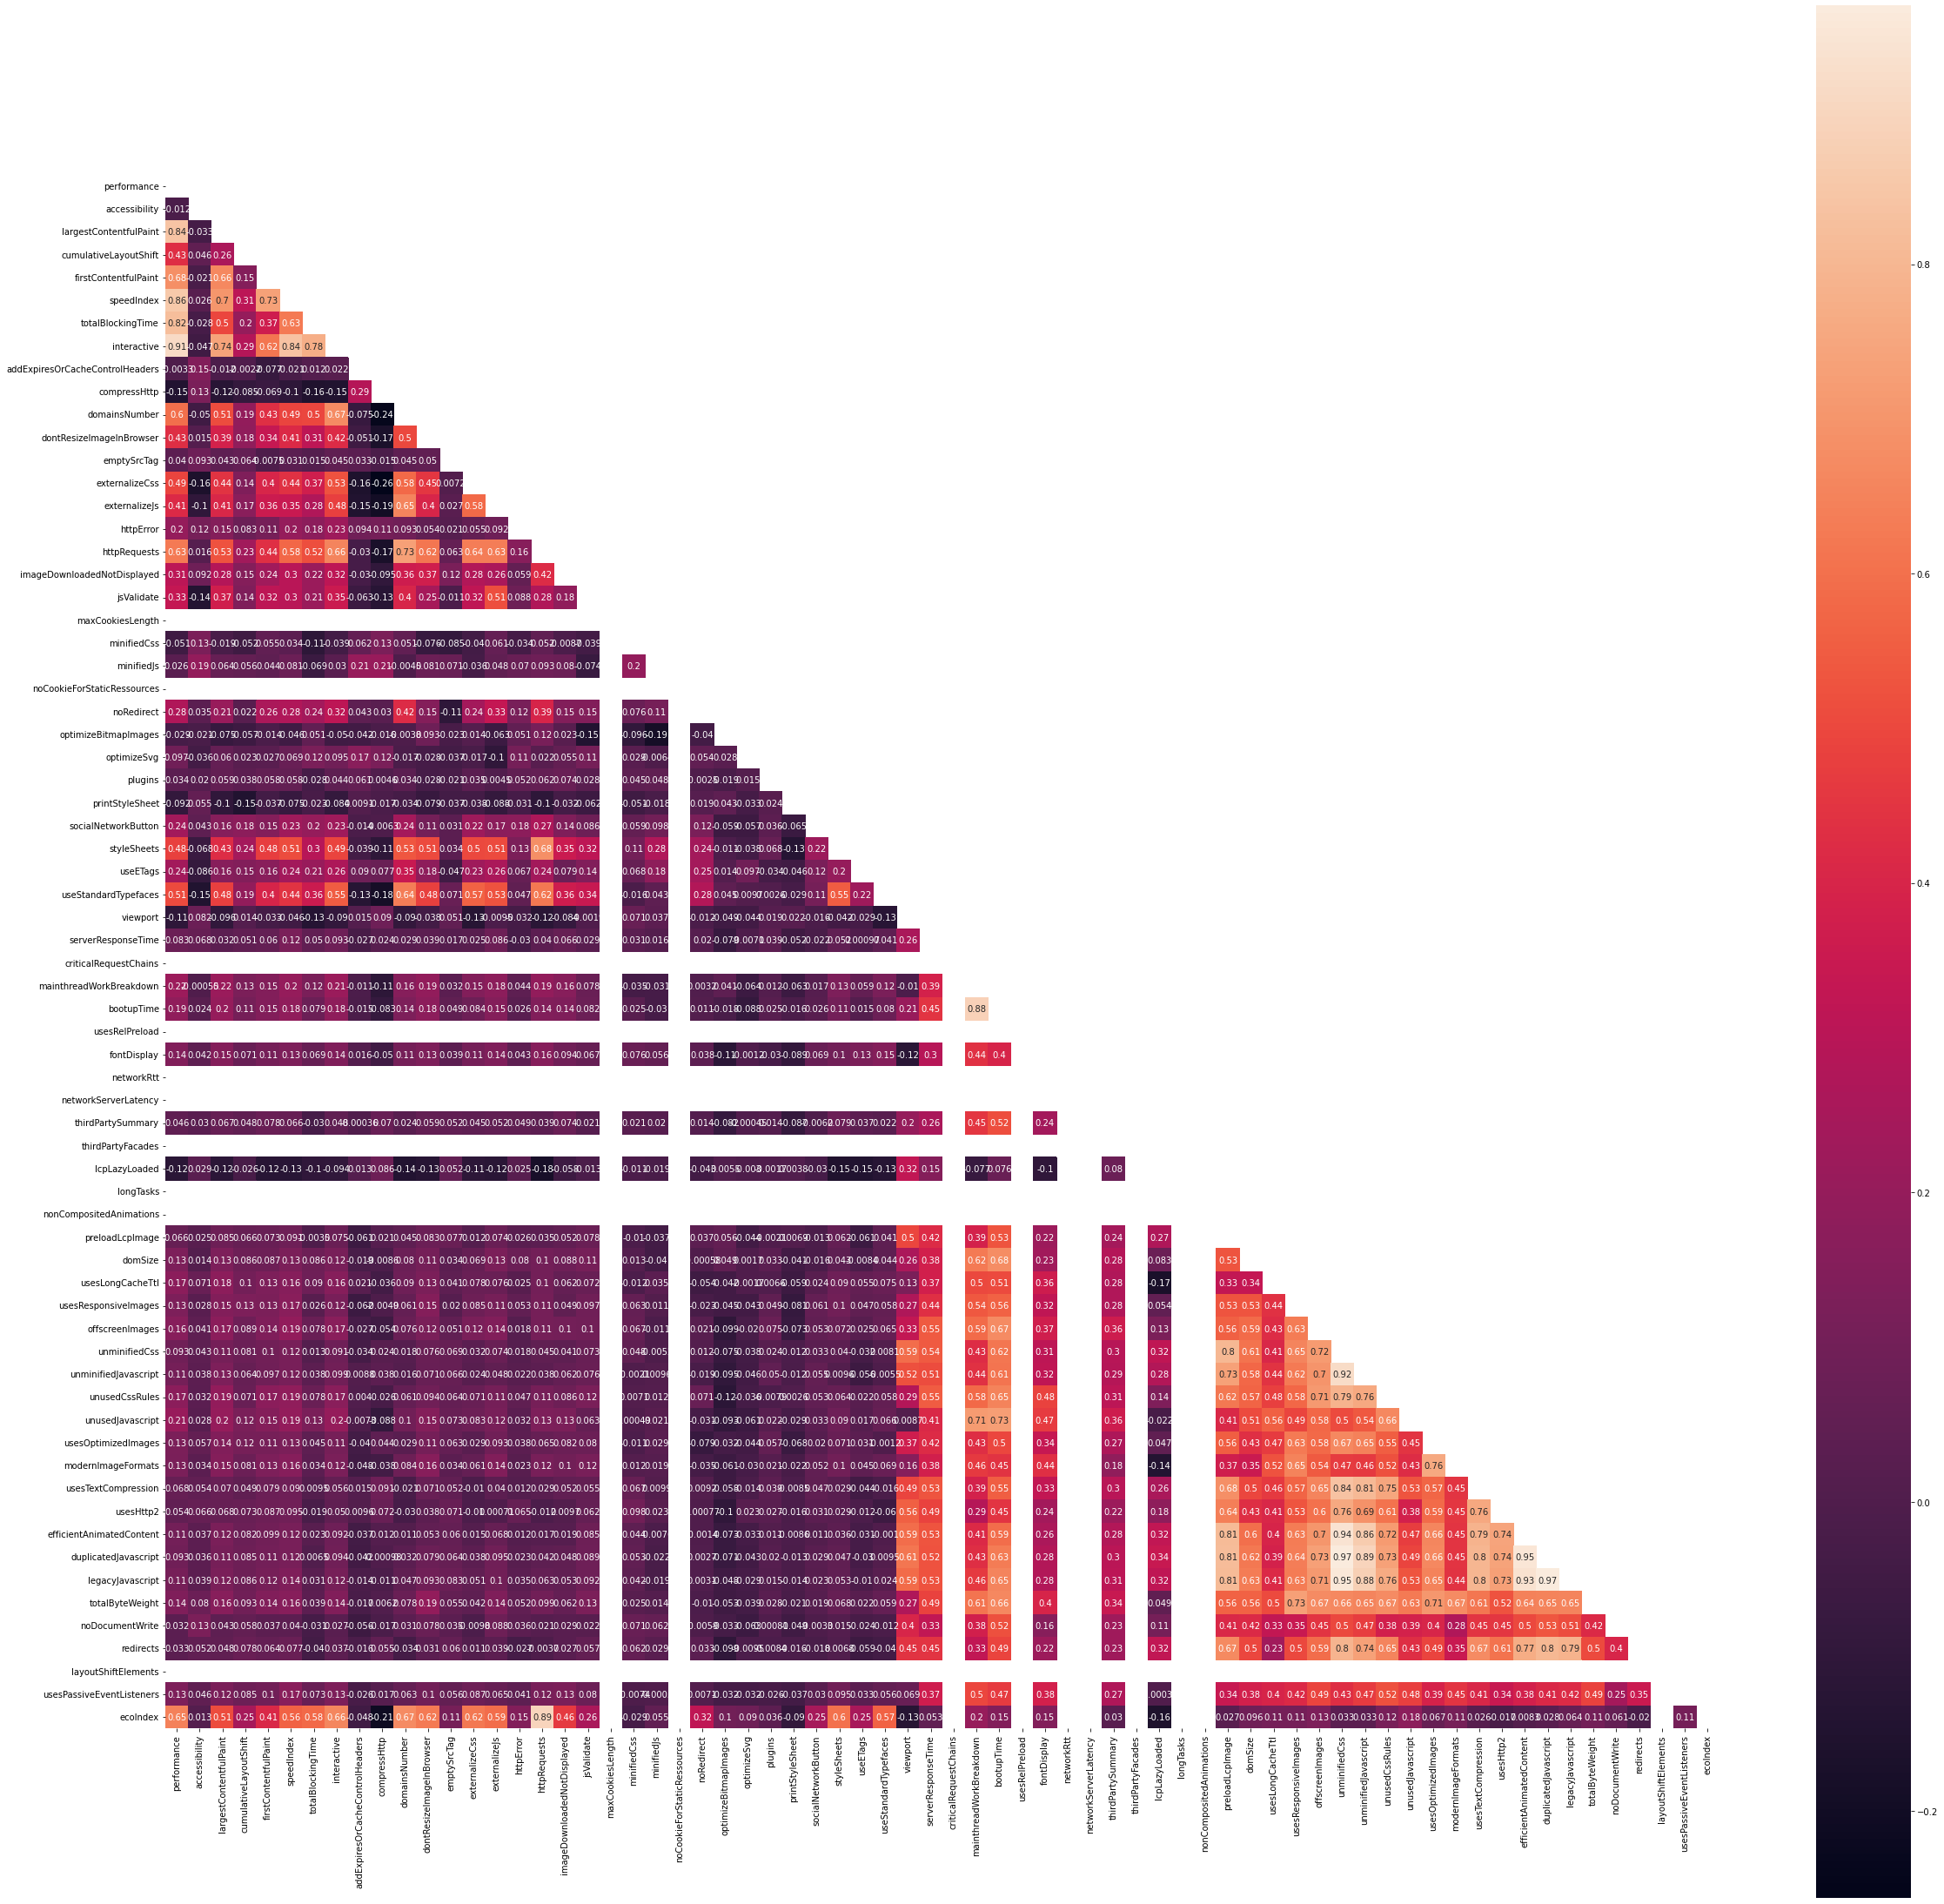

In [70]:
#This is the correlation matrix to display the correlation coefficient for the different variables

#pearson is the standard correlation coefficient
correlation = df.corr(method = 'pearson')

#plot the figure
plt.subplots(figsize = (40,40))

#mask upper triangle
masked = np.triu(np.ones_like(correlation, dtype=bool)) 

#correlation matrix with the coefficient
sns.heatmap(correlation,mask=masked,square = True, annot = True)



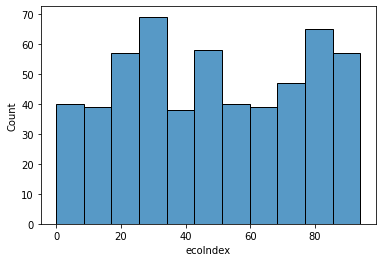

In [71]:
%matplotlib inline

sns.histplot(data=df, x='ecoIndex')


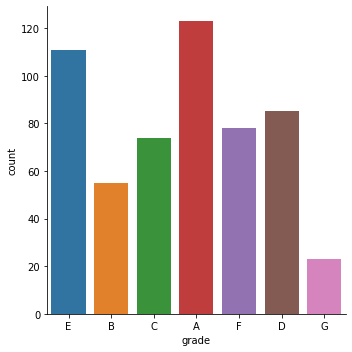

In [72]:

sns.catplot(x = 'grade', kind = 'count', data = df)

plt.show()

## function needed for later in the ML models

In [73]:
#function to get the feature importance to do the feature selection.
#This functions create a list with with all the features importances that the model considers higher 
#than the random variable
#this allows to retrain the model without the features that are not important

def feature_selection(importance_metric, X_train_number):
    
    r = pd.Series(importance_metric, index=X_train_number.columns)
    r = r.sort_values(axis=0, ascending=False)
    r = r.index.tolist()
    features = []
    for e in r:
        if e == 'RandomNumber':
            break
        features.append(e)
    
    return features

In [74]:
#Fucntion to get the most important features
#Here, we consider that it is an important feature when its greater than 1, but that can be changed ! 

def get_feature_importance(importance_metric, X_train_number):

    feat = pd.Series(importance_metric*100, index=X_train_number.columns)
    feat_s = feat.sort_values(axis=0, ascending=False)
    feat = feat_s.index.tolist()
    
    features = []
    for values in feat:
        if feat_s[values] > 1 :
            features.append(values)
            
    
    return features

In [75]:
#function to count the number of time the value is greater than x
# This serves as an evaluation on our artificial model
def count2(lst, x):
    count = 0
    for ele in lst:
        if (ele > x):
            count = count + 1
    return count

## Initial ML model

We first try to do a classification using Random Forest to predict the class of the EcoIndex

### classification : 

predict the class of the EcoIndex

In [76]:
X = df.drop(columns = ["ecoIndex",	"grade"])
y = df["grade"]

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

grid = {'n_estimators': [5,10,20,30,50,100,200] ,
               
            'max_features': ['auto', 'sqrt','log2'],

            'max_depth': [3, 5, 7, 9,12] ,

            'min_samples_split': [2,4, 6,8, 10,15,20,30] ,

            'min_samples_leaf': [1, 3, 4,6,10,15,17],
       }

forest = RandomForestClassifier()

random_rf = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf.fit(X_dev,  y_dev)

print ('Best Parameters: ', random_rf.best_params_, ' \n')

print("reesults before feature selectio:")
print(f'model score on training data : {random_rf.score(X_dev,  y_dev)}')
print(f'model score on testing data: {random_rf.score(X_test, y_test)}')

importances_dom = random_rf.best_estimator_.feature_importances_


Best Parameters:  {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 9}  

reesults before feature selectio:
model score on training data : 0.9111617312072893
model score on testing data: 0.509090909090909


precision: 0.43668482055578833
recall: 0.44566683316683314
F1score: 0.4301717034957623

confusion matrix:


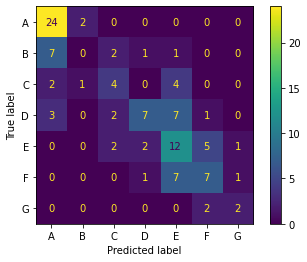

In [77]:
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix,ConfusionMatrixDisplay
y_pred = random_rf.predict(X_test)

metrics = precision_recall_fscore_support(y_test, y_pred,average='macro')

print("precision:", metrics[0])
print("recall:",metrics[1])
print("F1score:",metrics[2])


print("")
print("confusion matrix:")
confusion_matrix(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred, labels=random_rf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=random_rf.classes_).plot()
plt.show()

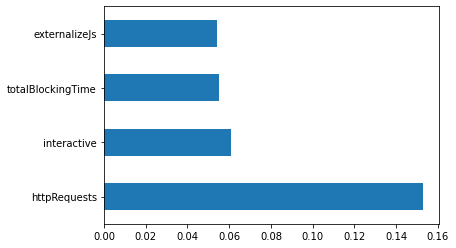

In [78]:
(pd.Series(importances_dom, index=X.columns)
   .nlargest(4)
   .plot(kind='barh')) 

As we can see, the accuracy is very bad and therefore we don't trust the feature importance of the model



### Regression: 

Predict the EcoIndex

In [79]:
X = df.drop(columns = ["ecoIndex",	"grade"])
y = df["ecoIndex"]

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

grid = {'n_estimators': [5,10,20,30,50,100,200] ,
               
            'max_features': ['auto', 'sqrt','log2'],

            'max_depth': [3, 5, 7, 9,12] ,

            'min_samples_split': [2,4, 6,8, 10,15,20,30] ,

            'min_samples_leaf': [1, 3, 4,6,10,15,17],
       }

forest = RandomForestRegressor()

random_rf = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf.fit(X_dev,  y_dev)

print ('Best Parameters: ', random_rf.best_params_, ' \n')

print("reesults before feature selectio:")
print(f'model score on training data : {random_rf.score(X_dev,  y_dev)}')
print(f'model score on testing data: {random_rf.score(X_test, y_test)}')

importances_dom = random_rf.best_estimator_.feature_importances_


Best Parameters:  {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 9}  

reesults before feature selectio:
model score on training data : 0.9325591128319002
model score on testing data: 0.8237097648641295


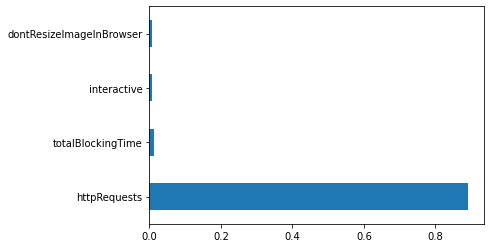

In [80]:
(pd.Series(importances_dom, index=X.columns)
   .nlargest(4)
   .plot(kind='barh')) 

## NB request

In [81]:
X = df.drop(columns = ["ecoIndex",	"grade", 'httpRequests'])
y = df["httpRequests"]

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

grid = {'n_estimators': [5,10,20,30,50,100,200] ,
               
            'max_features': ['auto', 'sqrt','log2'],

            'max_depth': [3, 5, 7, 9,12] ,

            'min_samples_split': [2,4, 6,8, 10,15,20,30] ,

            'min_samples_leaf': [1, 3, 4,6,10,15,17],
       }

forest = RandomForestRegressor()

random_rf_nbRequest = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf_nbRequest.fit(X_dev,  y_dev)

print ('Best Parameters: ', random_rf_nbRequest.best_params_, ' \n')

print("reesults before feature selectio:")
print(f'model score on training data : {random_rf_nbRequest.score(X_dev,  y_dev)}')
print(f'model score on testing data: {random_rf_nbRequest.score(X_test, y_test)}')

importances_nbRequest = random_rf_nbRequest.best_estimator_.feature_importances_

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 9}  

reesults before feature selectio:
model score on training data : 0.9225944385002498
model score on testing data: 0.7780582990046431


We will do feature selection in order to improve the accuracy of the test data

results after feature selection:
results before feature selection:
Best Parameters:  {'n_estimators': 30, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 7}  

model score on training data : 0.9438890480614034
model score on testing data: 0.8375693150599194
['domainsNumber', 'interactive', 'dontResizeImageInBrowser', 'styleSheets', 'useStandardTypefaces', 'externalizeJs', 'externalizeCss', 'performance', 'accessibility', 'totalBlockingTime', 'firstContentfulPaint']


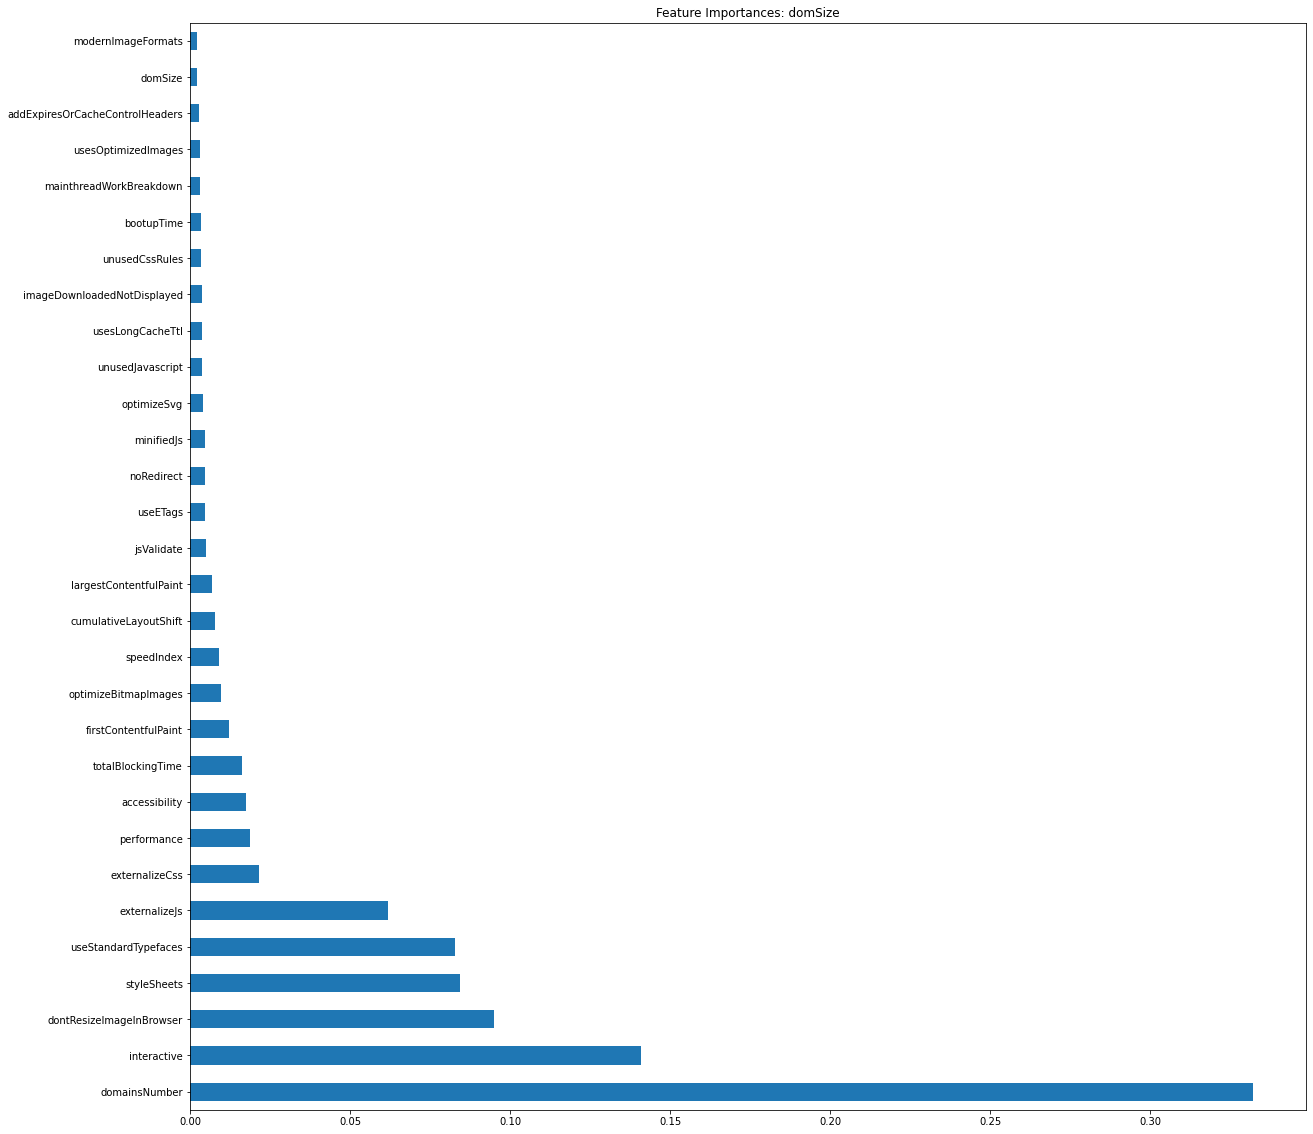

In [85]:
print("results after feature selection:")

#get a list of the features importances
importances_nbRequest_list = feature_selection(importances_nbRequest, X_dev)


#The dependant variables are now selected 
X = X[importances_nbRequest_list]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

forest = RandomForestRegressor()

random_rf_nbRequest = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf_nbRequest.fit(X_train, y_train)

print("results before feature selection:")
print ('Best Parameters: ', random_rf_nbRequest.best_params_, ' \n')


print(f'model score on training data : {random_rf_nbRequest.score(X_train, y_train)}')
print(f'model score on testing data: {random_rf_nbRequest.score(X_test, y_test)}')


importances_nbRequest = random_rf_nbRequest.best_estimator_.feature_importances_


#Plot the features importances
plt.figure(figsize=(20,20))
plt.title('Feature Importances: domSize')

(pd.Series(importances_nbRequest, index=X_train.columns)
   .nlargest(30)
   .plot(kind='barh')) 


#get a list of the features that will be selected for the algorithm
importance_nbRequest_list = get_feature_importance(importances_nbRequest, X_train)
print(importance_nbRequest_list)


## DomSize

Best Parameters:  {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 9}  

reesults before feature selectio:
model score on training data : 0.9051094890510949
model score on testing data: 0.7318840579710145
results after feature selection:
results before feature selection:
Best Parameters:  {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 12}  

model score on training data : 0.9315586800625888
model score on testing data: 0.7605765824398097
['httpRequests', 'interactive', 'externalizeJs', 'useStandardTypefaces', 'totalBlockingTime', 'addExpiresOrCacheControlHeaders', 'useETags', 'noRedirect', 'speedIndex', 'firstContentfulPaint', 'performance']


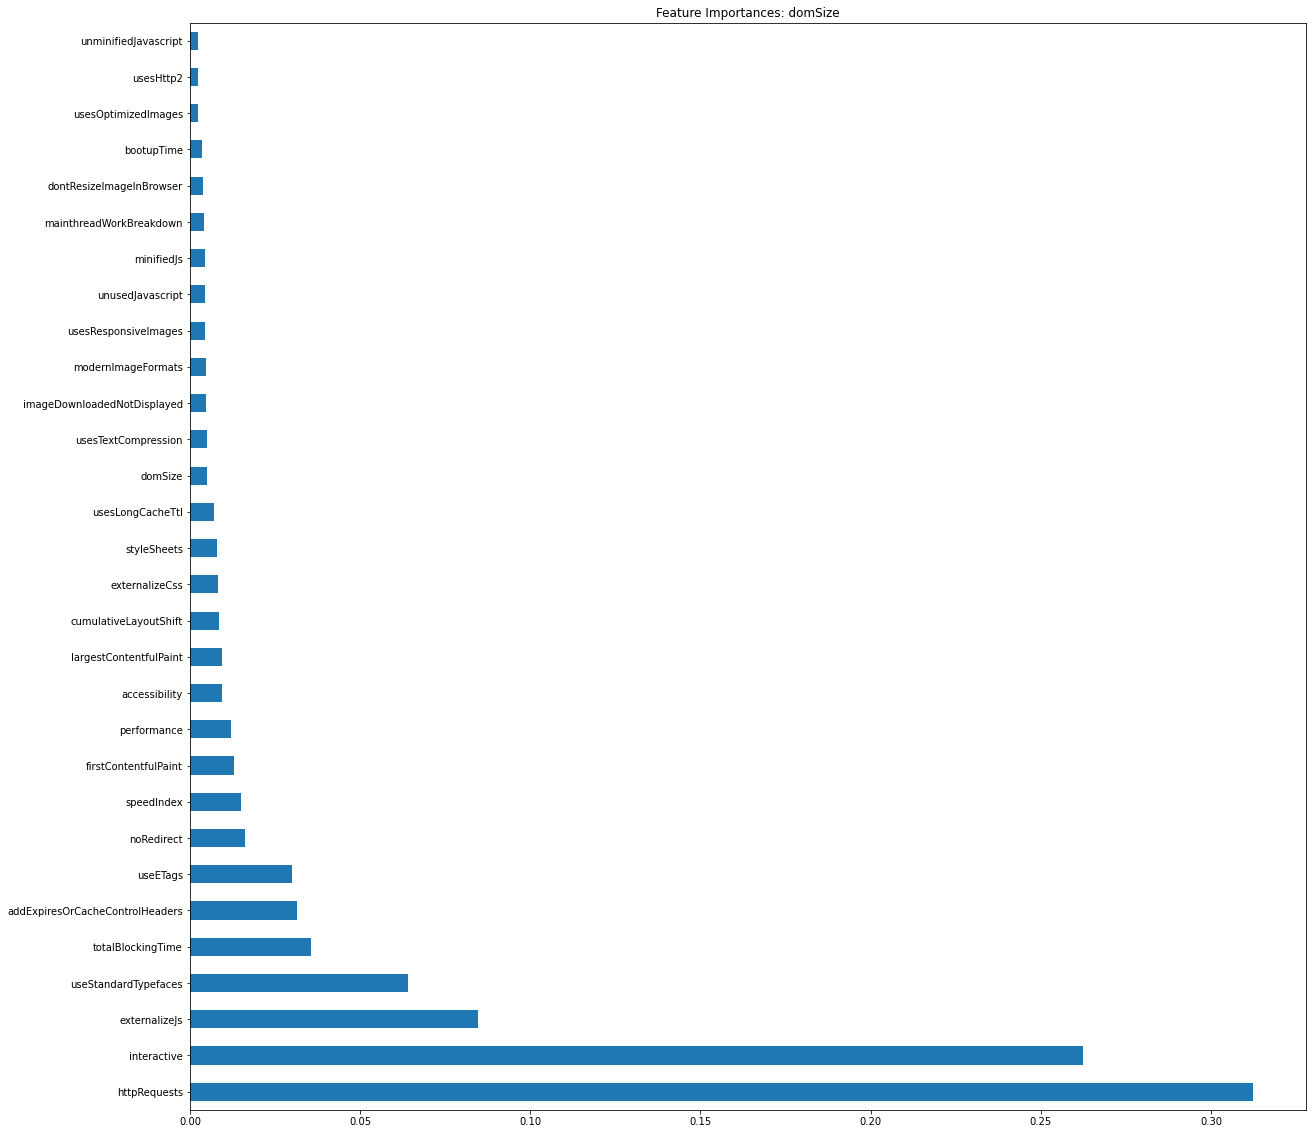

In [86]:
X = df.drop(columns = ["ecoIndex",	"grade", 'domainsNumber'])
y = df["domainsNumber"]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

forest = RandomForestClassifier()

random_rf = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf.fit(X_train, y_train)

print ('Best Parameters: ', random_rf.best_params_, ' \n')

print("reesults before feature selectio:")
print(f'model score on training data : {random_rf.score(X_train, y_train)}')
print(f'model score on testing data: {random_rf.score(X_test, y_test)}')

importances_dom = random_rf.best_estimator_.feature_importances_


#####################
# Feature selection #
#####################

print("results after feature selection:")

#get a list of the features importances
importances_dom_list = feature_selection(importances_dom, X_train)


#The dependant variables are now selected 
X = X[importances_dom_list]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

forest = RandomForestRegressor()

random_rf = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)
                               
random_rf.fit(X_train, y_train)

print("results before feature selection:")
print ('Best Parameters: ', random_rf.best_params_, ' \n')


print(f'model score on training data : {random_rf.score(X_train, y_train)}')
print(f'model score on testing data: {random_rf.score(X_test, y_test)}')


importances_dom = random_rf.best_estimator_.feature_importances_


#Plot the features importances
plt.figure(figsize=(20,20))
plt.title('Feature Importances: domSize')

(pd.Series(importances_dom, index=X_train.columns)
   .nlargest(30)
   .plot(kind='barh')) 


#get a list of the features that will be selected for the algorithm
importance_domSize_list = get_feature_importance(importances_dom, X_train)
print(importance_domSize_list)


results before feature selection:
Best Parameters:  {'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 12}  

model score on training data : 0.9999771799568767
model score on testing data: 0.7490808828449882
['interactive', 'httpRequests', 'totalBlockingTime', 'styleSheets', 'externalizeJs', 'addExpiresOrCacheControlHeaders', 'largestContentfulPaint', 'performance', 'useStandardTypefaces', 'imageDownloadedNotDisplayed', 'noRedirect', 'useETags', 'externalizeCss', 'speedIndex', 'dontResizeImageInBrowser', 'firstContentfulPaint', 'accessibility']


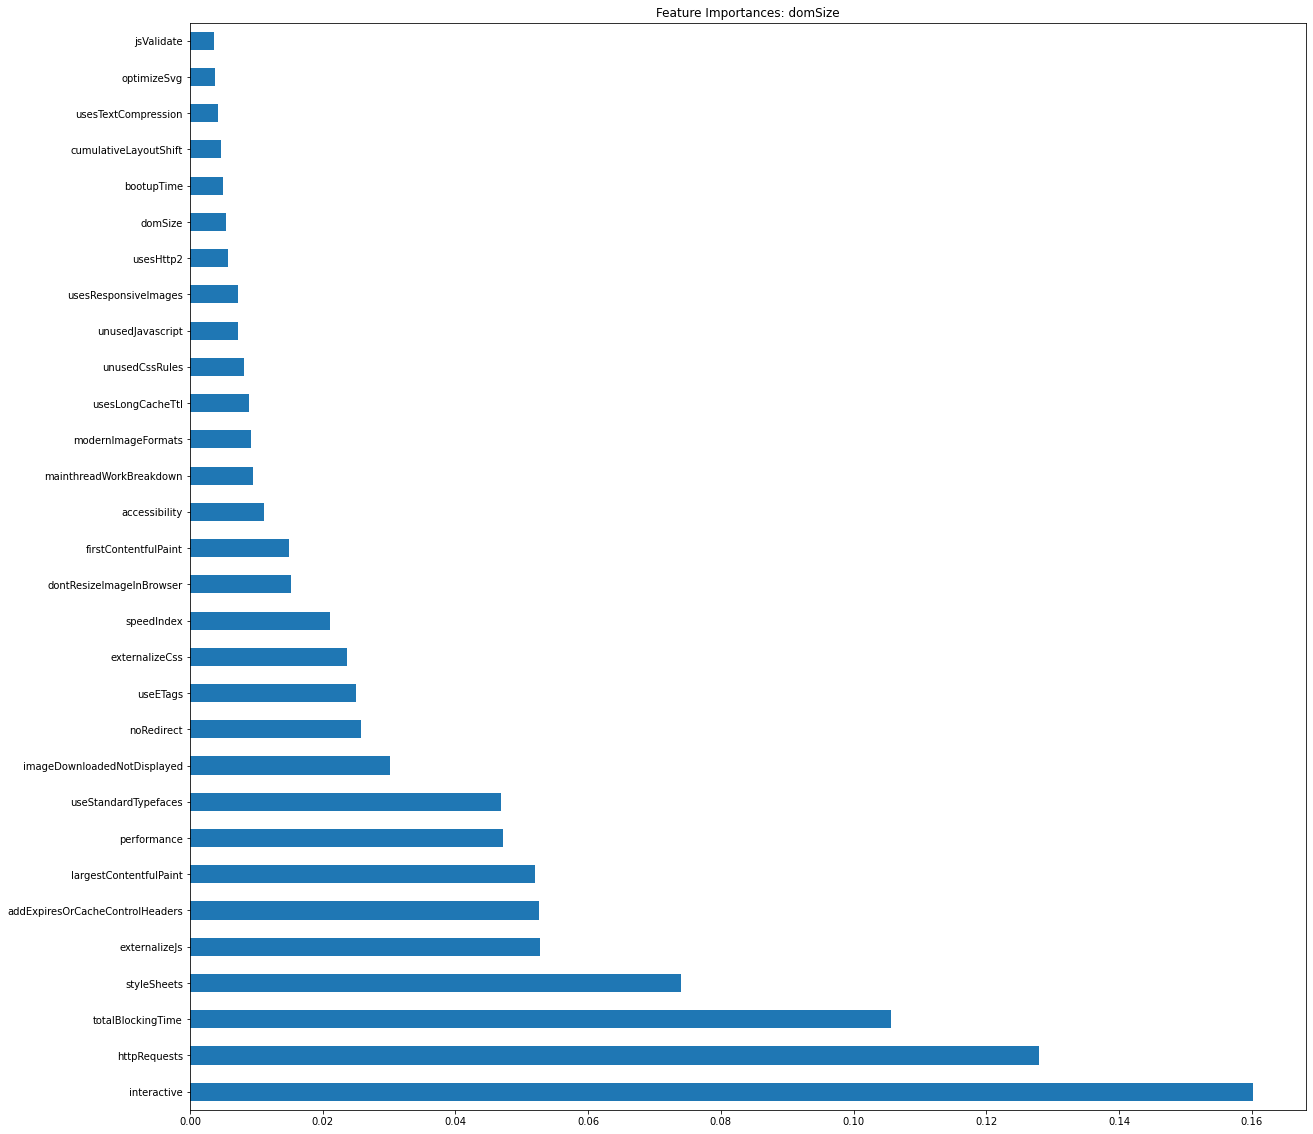

In [87]:
## XG Boost


from sklearn.ensemble import GradientBoostingRegressor


X = df.drop(columns = ["ecoIndex",	"grade", 'domainsNumber'])
y = df["domainsNumber"]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)


params = {'min_samples_split' : [2,10,50],
          'learning_rate' : [0.1,7,100],
          'n_estimators' : [20, 40, 70]}


forest = GradientBoostingRegressor()

random_rf = RandomizedSearchCV(estimator = forest, param_distributions = grid, n_iter = 60)


random_rf.fit(X_train, y_train)

print("results before feature selection:")
print ('Best Parameters: ', random_rf.best_params_, ' \n')


print(f'model score on training data : {random_rf.score(X_train, y_train)}')
print(f'model score on testing data: {random_rf.score(X_test, y_test)}')


importances_dom = random_rf.best_estimator_.feature_importances_


#Plot the features importances
plt.figure(figsize=(20,20))
plt.title('Feature Importances: domSize')

(pd.Series(importances_dom, index=X_train.columns)
   .nlargest(30)
   .plot(kind='barh')) 


#get a list of the features that will be selected for the algorithm
importance_domSize_list = get_feature_importance(importances_dom, X_train)
print(importance_domSize_list)



## Artificial new dataset

We are now creating an artificial new dataset 
We are changing the values of the X test dataset
This is to check if indeed, the value retrieved by the feature importance, if we increase them, are we really changing the score

In [96]:
new = pd.concat([X_test,y_test], axis = 1)
new_httpRequests = new

httpRequests_imp = ['domainsNumber', 'interactive', 'externalizeJs', 'styleSheets', 'dontResizeImageInBrowser']
for features in httpRequests_imp:

  new_httpRequests.loc[new_httpRequests['httpRequests'] < 25 , features] = 50



previous number of low httpRequests: 86
current number of httpRequests: 122


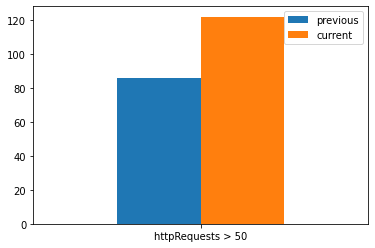

In [98]:
new_httpRequests = new_httpRequests[importances_nbRequest_list]

old = list(new['httpRequests'])
y_pred = random_rf_nbRequest.predict(new_httpRequests)

print('previous number of low httpRequests:', count2(old, 30))
print('current number of httpRequests:',count2(y_pred, 30))

old = count2(old, 30)
current = count2(y_pred, 30)

df = pd.DataFrame({'previous': old,'current': current}, index = ['httpRequests > 50'])
ax = df.plot.bar(rot=0)